# Predict attrition of valuable employees
## by Beijia(Frances) Yu

## Preliminary Wrangling

> * This is a fictional data set created by IBM data scientists. 
> * Reference: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
data_dir = './data'

data_filepath = os.path.join(data_dir, 'WA_Fn-UseC_-HR-Employee-Attrition.csv')

df = pd.read_csv(data_filepath)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### What is the structure of your dataset?

> There are 1470 records in total. There are 26 numeric variables and 9 categorical variables 

### What is/are the main feature(s) of interest in your dataset?

> Uncover the factors that lead to employee attrition

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features can be seperated into groups
> * age, education, education field, gender, martial status, over 18
> * daily rate, hourly rate, monthly rate, monthly income
> * environment satisfaction, job satisfaction, relationship satisfaction
> * business travel, distance from home
> * overtime, job involvement, performance rating
> * numbwe of companies worked, total number of working years
> * years at company, years in current role, years with current manager, years since last promotion

## Univariate Exploration

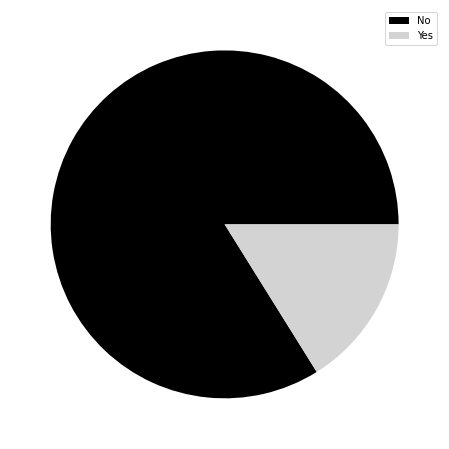

In [4]:
gk = df.groupby('Attrition')

labels = gk.groups

patches, texts = plt.pie(gk['Attrition'].count(), colors=['k', 'lightgray'])

plt.legend(patches, labels, loc="best")

> **Summary**
> * number of people with Employee Attrition << number of people without Employee Attrition

---
---

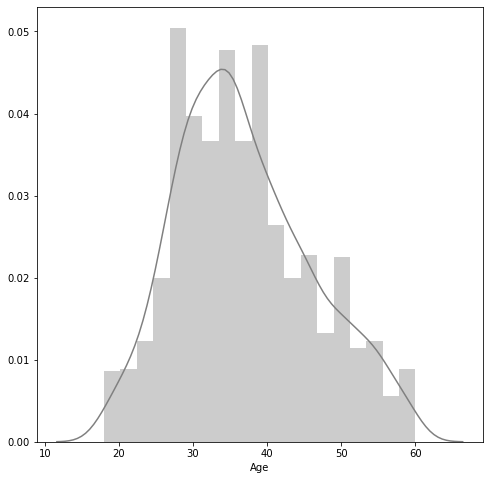

In [5]:
sns.distplot(df['Age'], color="gray")

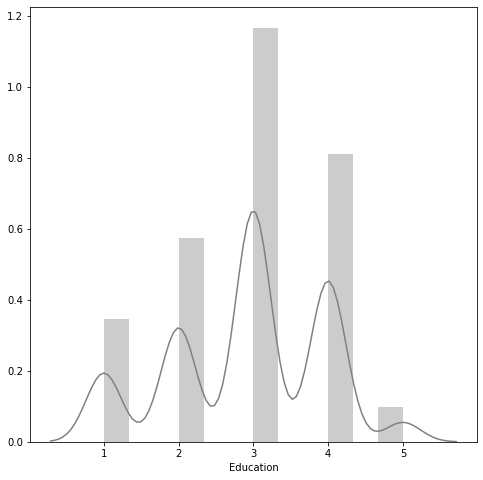

In [6]:
sns.distplot(df['Education'], color="gray")

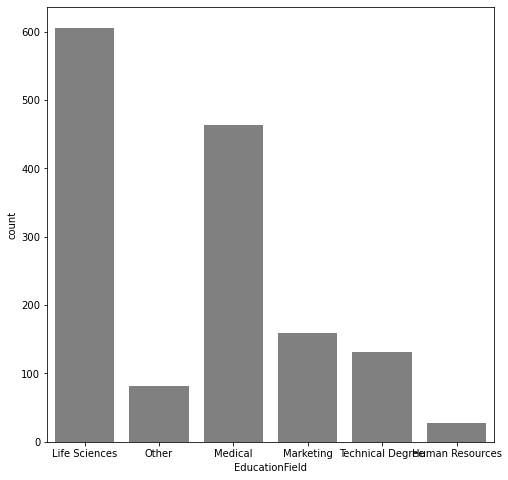

In [7]:
sns.countplot(x="EducationField", data=df, color="gray")

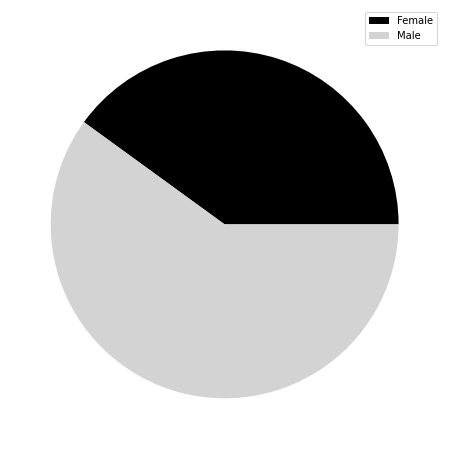

In [8]:
gk = df.groupby('Gender')

labels = gk.groups

patches, texts = plt.pie(gk['Gender'].count(), colors=['k', 'lightgray'])

plt.legend(patches, labels, loc="best")

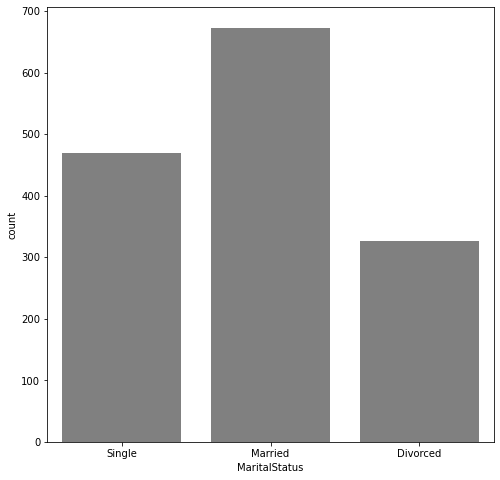

In [51]:
sns.countplot(x="MaritalStatus", data=df, color="gray")

> **Summary**
> * Martial status, Education, Age have normal distribution
> * Number of female >> number of male
> * Education field has right skewed distribution

---
---

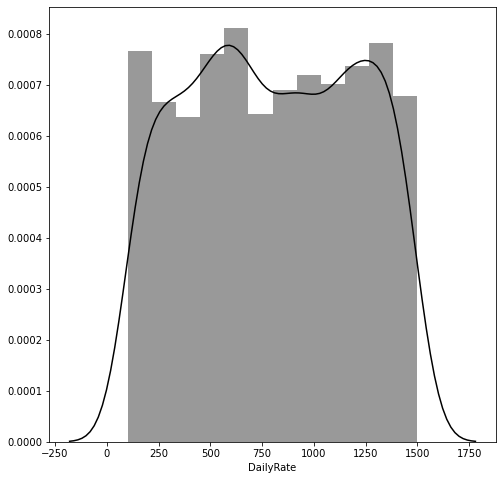

In [10]:
sns.distplot(df['DailyRate'], color="k")

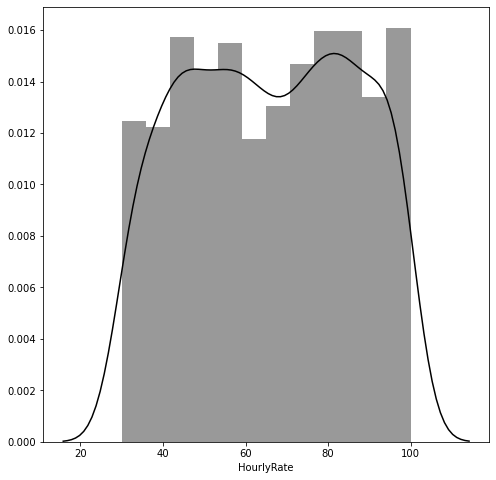

In [11]:
sns.distplot(df['HourlyRate'], color="k")

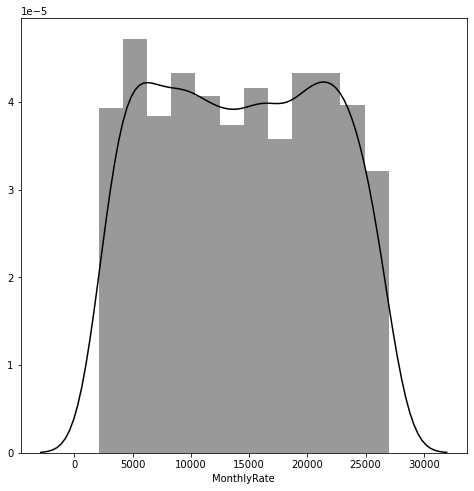

In [12]:
sns.distplot(df['MonthlyRate'], color="k")

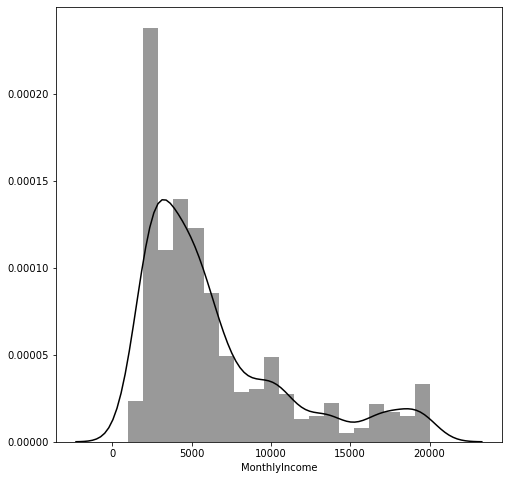

In [13]:
sns.distplot(df['MonthlyIncome'], color="k")

> **Summary**
> * Monthly rate, hourly rate and daily rate have same distribution. They all have normal distribution
> * Monthly income has right skewed distribution. Most people earn about $2500 monthly

---
---

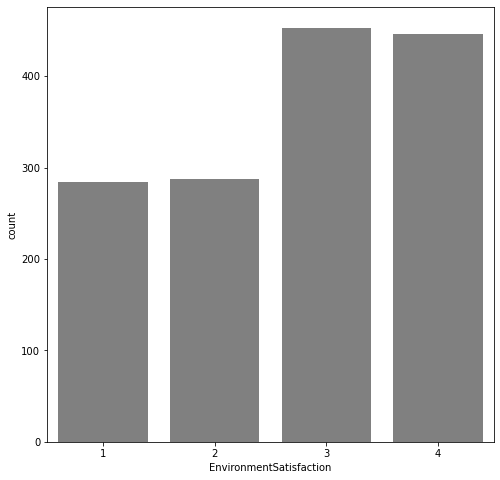

In [52]:
sns.countplot(x="EnvironmentSatisfaction", data=df, color="gray")

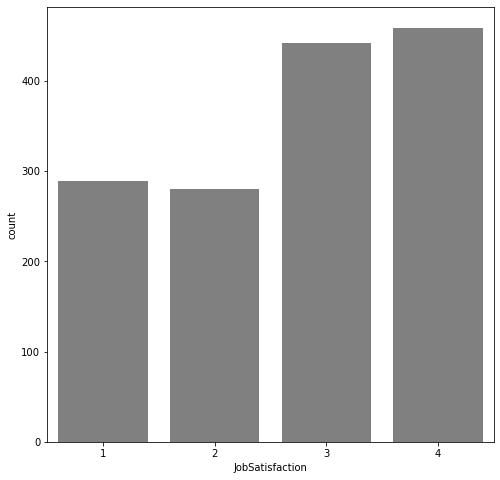

In [53]:
sns.countplot(x="JobSatisfaction", data=df, color="gray")

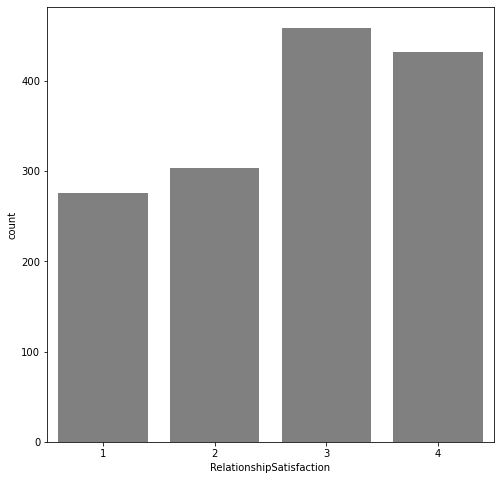

In [54]:
sns.countplot(x="RelationshipSatisfaction", data=df, color="gray")

> **Summary**
> * Distributions are the same for all satisfaction.
> * People are very satisfied with relationship, job and environment.

---
---

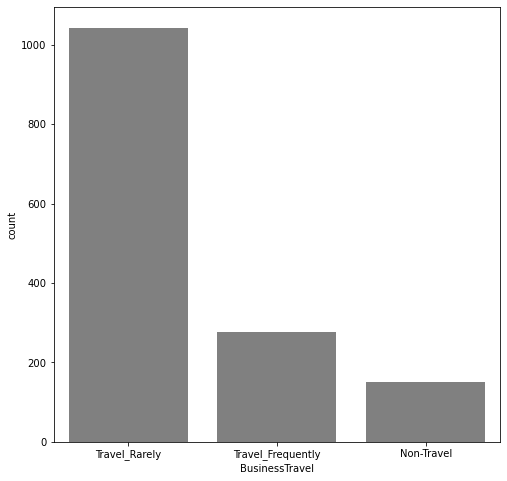

In [55]:
sns.countplot(x="BusinessTravel", data=df, color="gray")

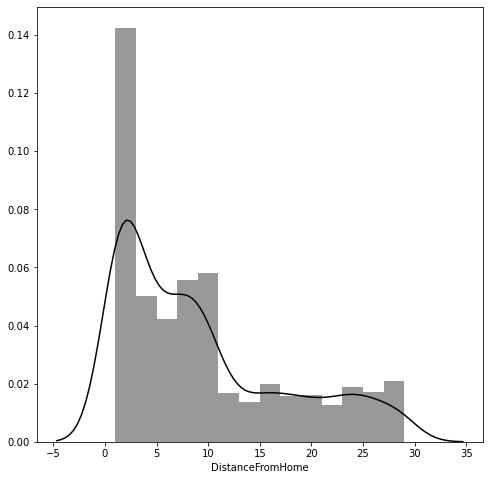

In [57]:
sns.distplot(df['DistanceFromHome'], color="k")

> **Summary**
> * Most people do not need to travel too much for work.

---
---

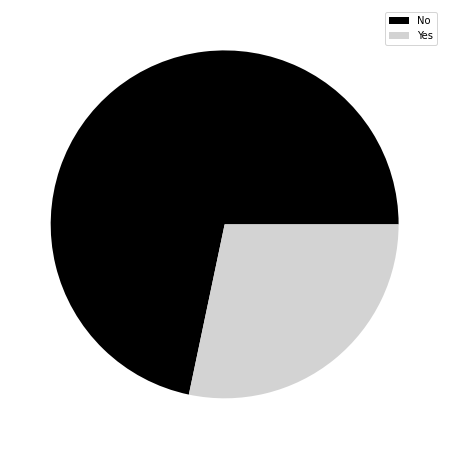

In [19]:
gk = df.groupby('OverTime')

labels = gk.groups

patches, texts = plt.pie(gk['OverTime'].count(), colors=['k', 'lightgray'])

plt.legend(patches, labels, loc="best")

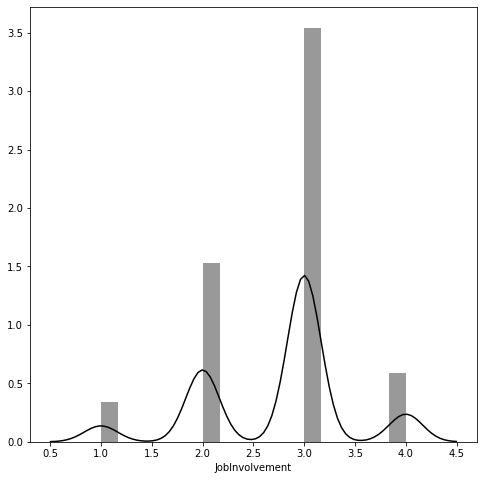

In [59]:
sns.distplot(df['JobInvolvement'], color="k")

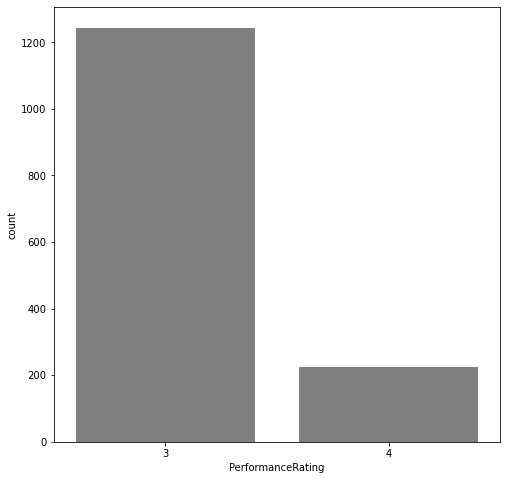

In [60]:
sns.countplot(x="PerformanceRating", data=df, color="gray")

> **Summary**
> * Number of people who work overtime << number of people who do not work overtime
> * People are very much involved in their work, and they perform well

---
---

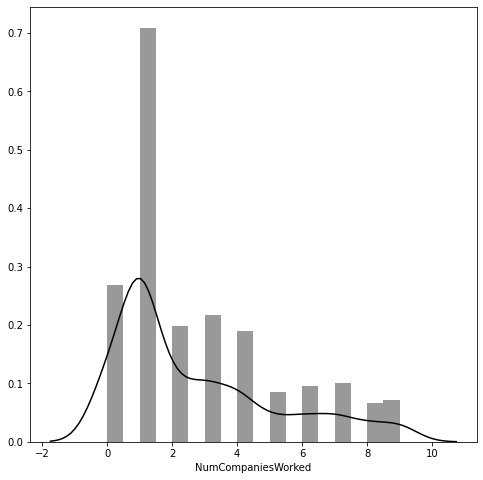

In [22]:
sns.distplot(df['NumCompaniesWorked'], color="k")

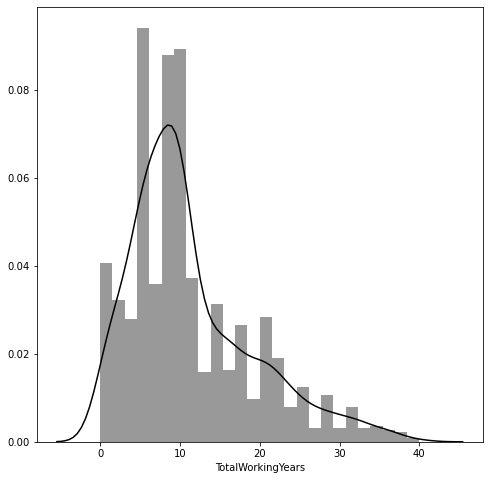

In [23]:
sns.distplot(df['TotalWorkingYears'], color="k")

> **Summary**
> * Number of companies worked and total number of working years have right skewed distribution.
> * Most people work for one company.
> * The total number of working years is between 0 - 10 for most people

---
---

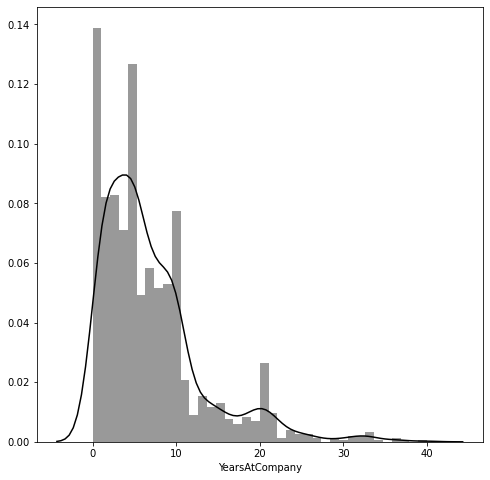

In [24]:
sns.distplot(df['YearsAtCompany'], color="k")

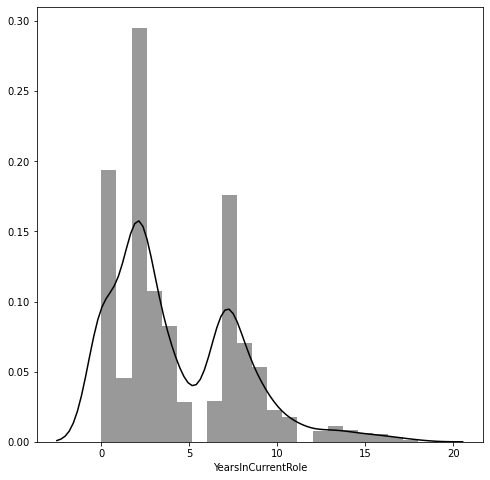

In [25]:
sns.distplot(df['YearsInCurrentRole'], color="k")

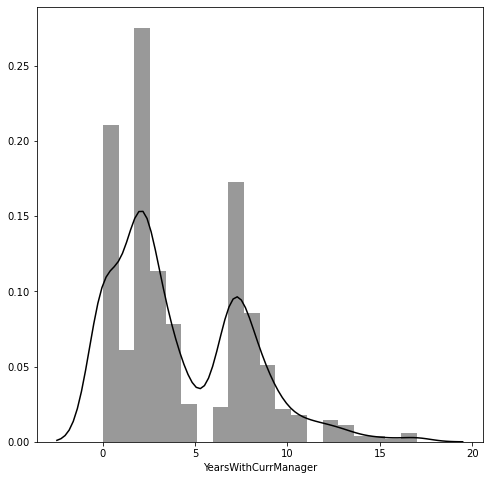

In [26]:
sns.distplot(df['YearsWithCurrManager'], color="k")

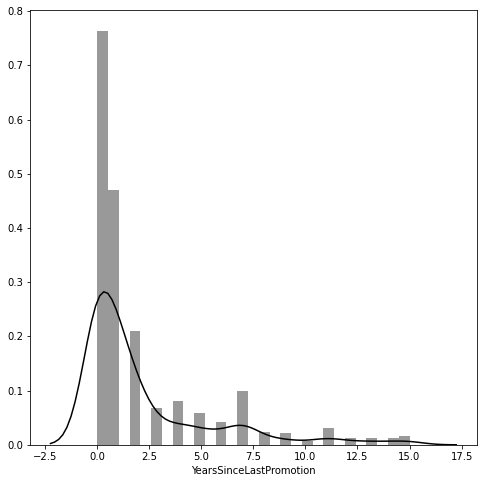

In [27]:
sns.distplot(df['YearsSinceLastPromotion'], color="k")

> **Summary**
> * All of years at company, years in current role, year with current manager and years since last promotion has right skewed distributions
> * The distributions of years in current role and years with current manager are almost identical.
> * Most people just get promoted to the current position.

---
---
---

In [28]:
df['EmployeeCount'].unique()

array([1])

In [29]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068])

In [30]:
df['Over18'].unique()

array(['Y'], dtype=object)

> **Summary**
> * Ignore the above columns in future analysis because
>  * Employee count, employee number have only one value
>  * Employee number is index of data

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> * Several groups of features have similar distributions.
> * Some of them have normal distributions whereas others have right skewed distribution
> * No.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some of them are right skewed distributions. However, their skeweness clearly shows the chacteristics of the features. As a result, I did not do any modification on the data.

## Bivariate Exploration

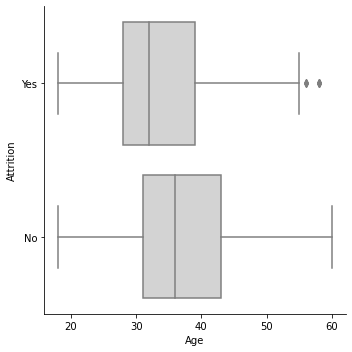

In [63]:
sns.catplot(x="Age", y="Attrition", data=df, color='lightgray', kind="box")

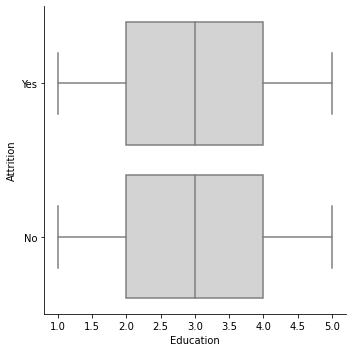

In [64]:
sns.catplot(x="Education", y="Attrition", data=df, color='lightgray', kind="box")

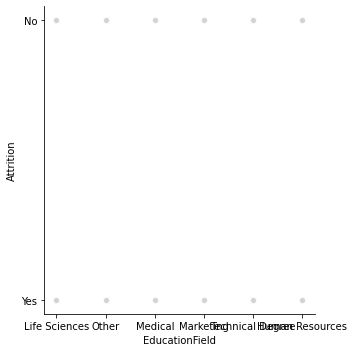

In [65]:
sns.relplot(x="EducationField", y="Attrition", data=df, color='k')

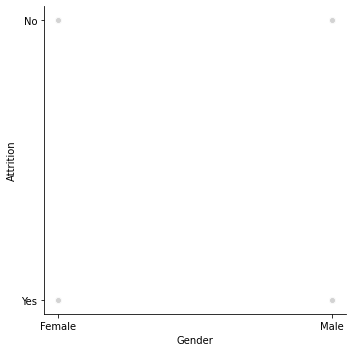

In [66]:
sns.relplot(x="Gender", y="Attrition", data=df, color='k')

> **Summary**
> * No correlation with attrition: gender, education field, education
> * There is a weak correlation between age and attrition
> * Younger people(< 31) tends to have employee attrition compared to people older than 38

---
---

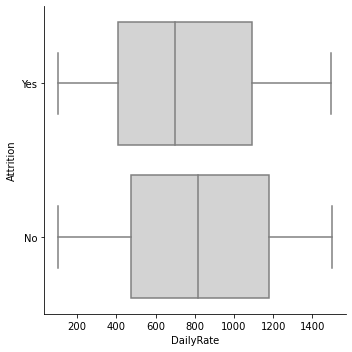

In [67]:
sns.catplot(x="DailyRate", y="Attrition", data=df, color='lightgray', kind="box")

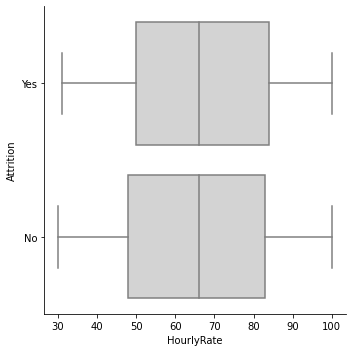

In [68]:
sns.catplot(x="HourlyRate", y="Attrition", data=df, color='lightgray', kind="box")

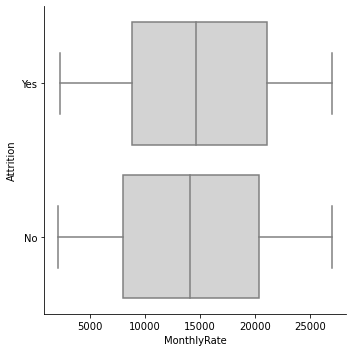

In [69]:
sns.catplot(x="MonthlyRate", y="Attrition", data=df, color='lightgray', kind="box")

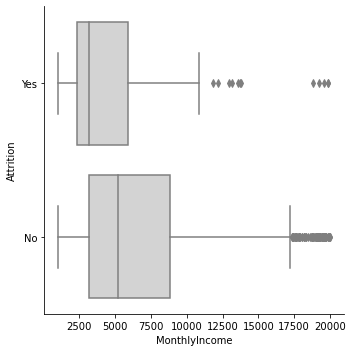

In [70]:
sns.catplot(x="MonthlyIncome", y="Attrition", data=df, color='lightgray', kind="box")

> **Summary**
> * Hourly rate and monthly rate have similar distributions
> * Compared to the other two rates, daily rate has a slightly different distribution
> * All of daily rate, hourly rate and montly rate have weak correlations with attrition
> * Compared to other three rates, there is a stronger correlation between monthly income and attrition. People with lower monthly income tends to have more employee attrition 

---
---

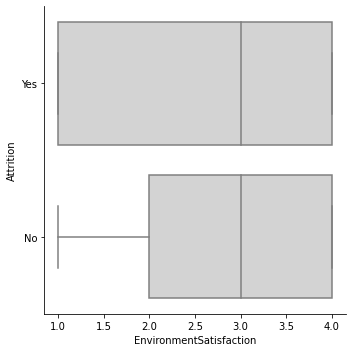

In [71]:
sns.catplot(x="EnvironmentSatisfaction", y="Attrition", data=df, color='lightgray', kind="box")

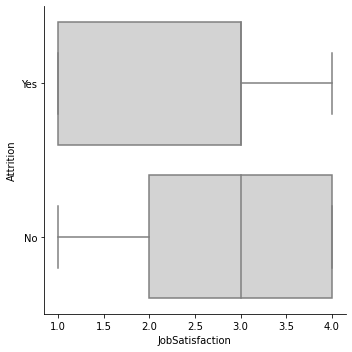

In [72]:
sns.catplot(x="JobSatisfaction", y="Attrition", data=df, color='lightgray', kind="box")

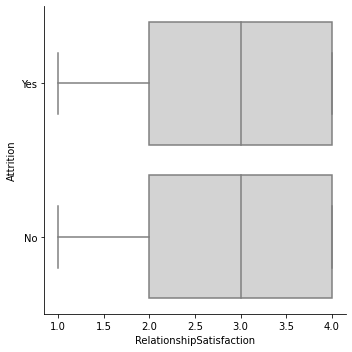

In [73]:
sns.catplot(x="RelationshipSatisfaction", y="Attrition", data=df, color='lightgray', kind="box")

> **Summary**
> * In univariate exploration, these three features have similar traits. However, the correlations between attrition and them are quite different
> * No correlation between relationship satisfaction and attrition.
> * Weak negative correlation between job satisfaction and employee attrition
> * People who are more satisfied with the environment have less employee attrition

---
---

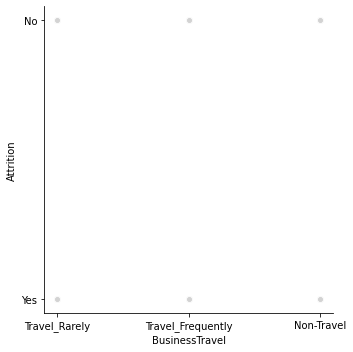

In [74]:
sns.relplot(x="BusinessTravel", y="Attrition", data=df, color='k')

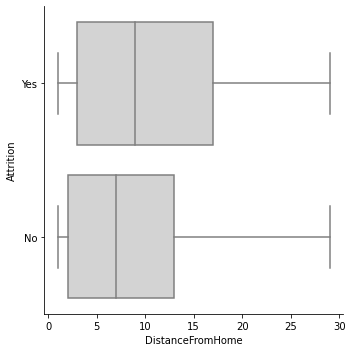

In [75]:
sns.catplot(x="DistanceFromHome", y="Attrition", data=df, color='lightgray', kind="box")

> **Summary**
> * No correlation between business travel and employee attrition
> * People who live slightly further seems to have more employee attrition

---
---

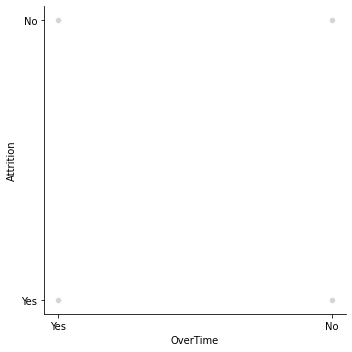

In [76]:
sns.relplot(x="OverTime", y="Attrition", data=df, color='k')

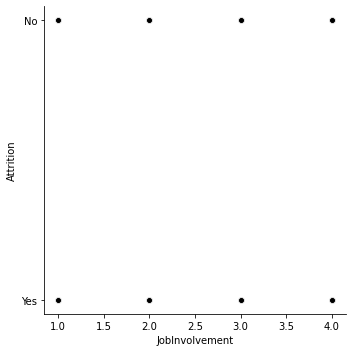

In [45]:
sns.relplot(x="JobInvolvement", y="Attrition", data=df, color='k')

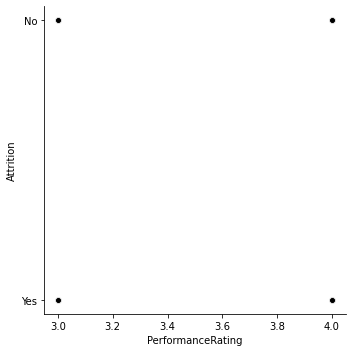

In [46]:
sns.relplot(x="PerformanceRating", y="Attrition", data=df, color='k')

> **Summary**
> * No correlation with attrition: performance rating, job involvement and overtime

---
---

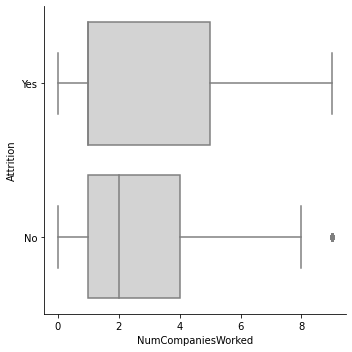

In [77]:
sns.catplot(x="NumCompaniesWorked", y="Attrition", data=df, color='lightgray', kind="box")

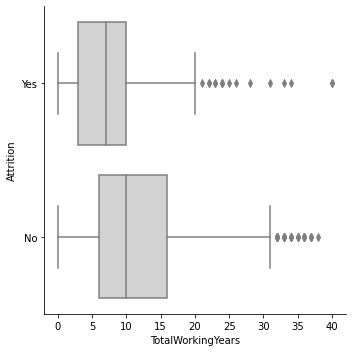

In [78]:
sns.catplot(x="TotalWorkingYears", y="Attrition", data=df, color='lightgray', kind="box")

> **Summary**
> * People who work for more companies tends to feel more employee attrition
> * People who work for more years tends to feel less employee attrition

---
---

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There are several features having no correlation with employee attrition
> In univariate exploration, environment satisfaction, job satisfaction and relationship satisfaction have similar distributions. However, the correlation between attrition and them are quite different.
> Some features have positive correlations but others have negative relations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most categorical variables does not have correlation with employee attrition

## Multivariate Exploration

In [49]:
palette = sns.set_palette("Greys")

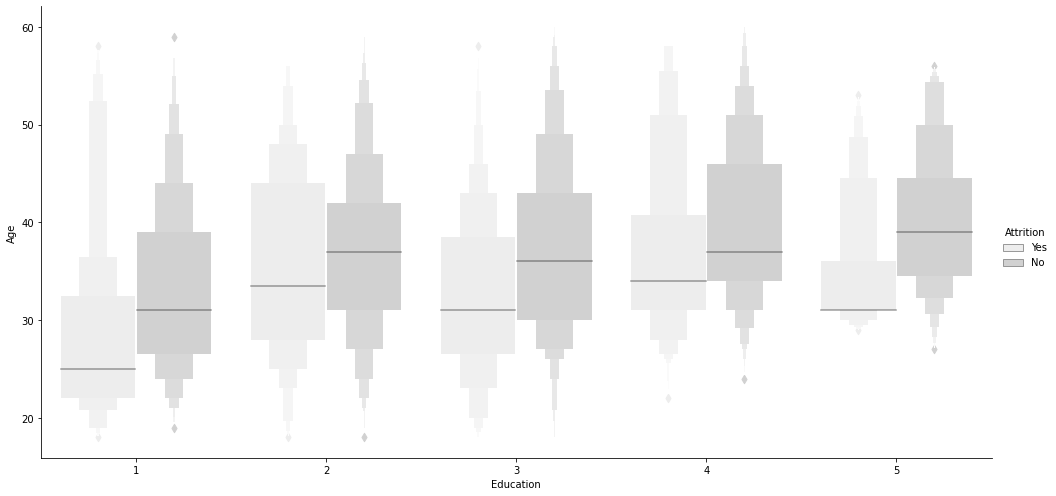

In [50]:
sns.catplot(
    y="Age", 
    x="Education", 
    data=df, 
    height=7, 
    aspect=2,
    hue='Attrition', 
    palette=palette, 
    kind="boxen")

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!